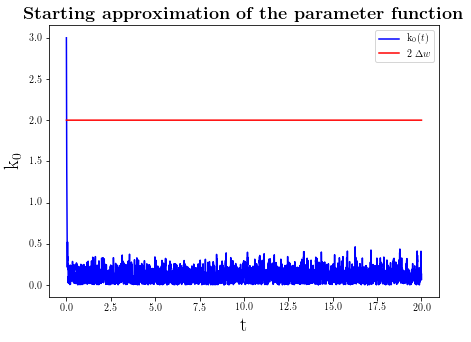

2.3361125749463216 0.13596666969225427 0.1364144921657585
2.0


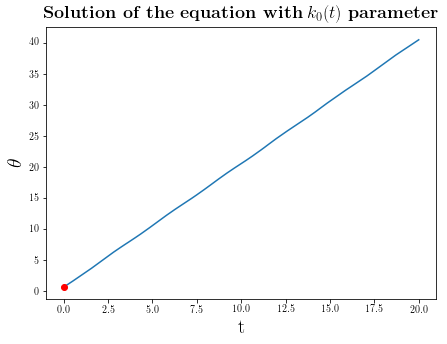

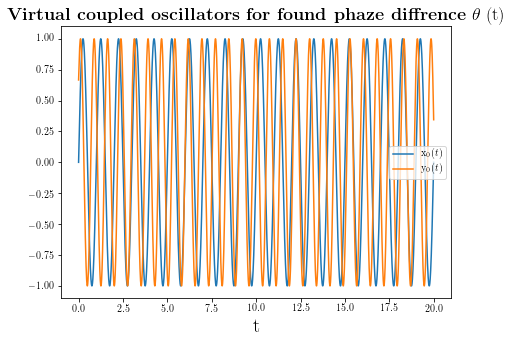

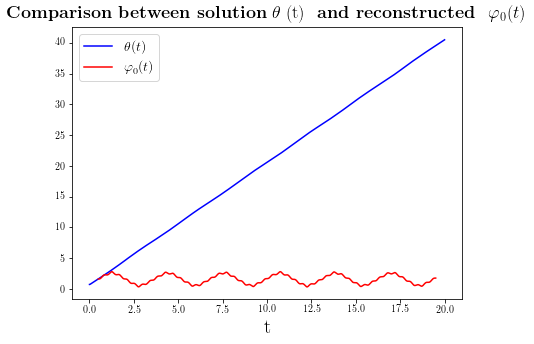

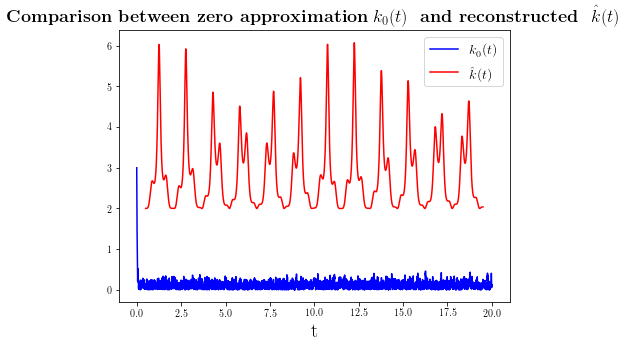

383.67581804124876

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=20
L=n*T

N_grid=8000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))
p

st=200
fn=7799


M=1.5

k0=np.zeros(N_grid, np.dtype(float))

# здесь можно подумать над тем, как мы его инициализируем
alpha=0.9
sigma=1
mu=0.1
xi=sigma*np.random.randn(N_grid)+mu


for i in range(N_grid):
    if i==0:
        k0[i]=M*2*dw
    else:
        #k0[i]=alpha*k0[i-1]+np.sqrt(h)*xi[i-1]
        dif=np.random.normal(0, np.sqrt(h)*sigma)
        k0[i]=alpha*k0[i-1]+dif
        if k0[i]<0:
            k0[i]=2*k0[i-1]-k0[i]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, [2*dw]*N_grid, 'r')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

print(k0_f(t[2]+h/2), k0_f(t[2*p]-h/2), k0_f(t[N_grid-1]+h))

f=lambda t, x: 2*dw-k0_f(t)*sin(x)
print(f(1, 0))

init=np.arcsin(2*dw/k0[0])

theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, theta)
plt.plot(0, init, 'ro')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$\theta $', fontsize=20)
plt.title(r'\textbf{Solution of the equation with} $k_0(t)$ \textbf{parameter}', fontsize=18)
plt.show()

theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, x0, label='$x_0(t)$')
plt.plot(t, y0, label='$y_0(t)$')
plt.legend(['x_0(t)', 'y_0(t)'])
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Virtual coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

C_0=[0]*N_grid

for i in range(N_grid):
    if (t[i]-T/2>=0) and (t[i]+T/2<=L):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
phi0=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, theta, 'b')
plt.plot(t, phi0, 'r')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

#dphi0=np.diff(phi0)/h
#dphi0[fn]=dphi0[fn-1]
#dphi0=np.append(dphi0, nan)

#k_hat=np.divide(np.array([2*dw]*N_grid)-dphi0, np.sin(phi0))

k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

mk=np.array([np.mean(k0[st:fn])]*(fn-st))
sk=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk

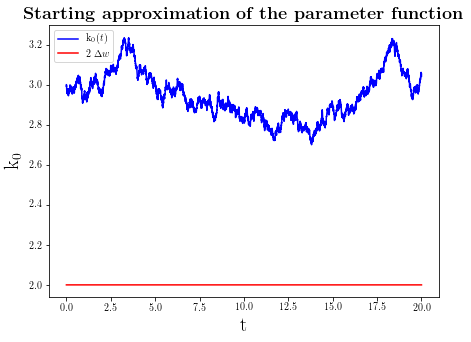

2.9947578928967125 2.94191016445723 3.0380333285787953
2.0


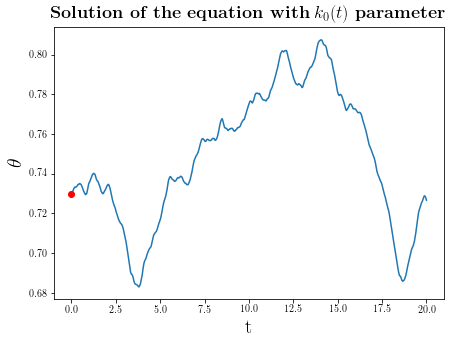

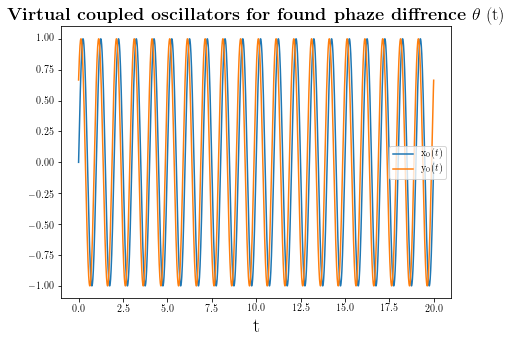

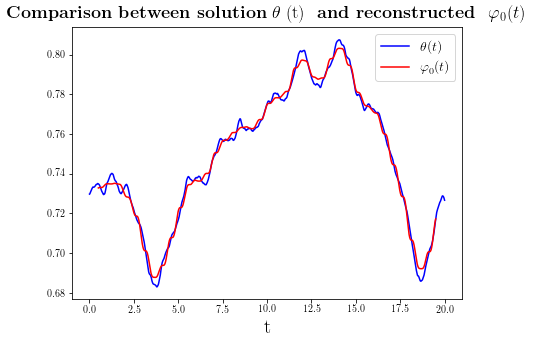

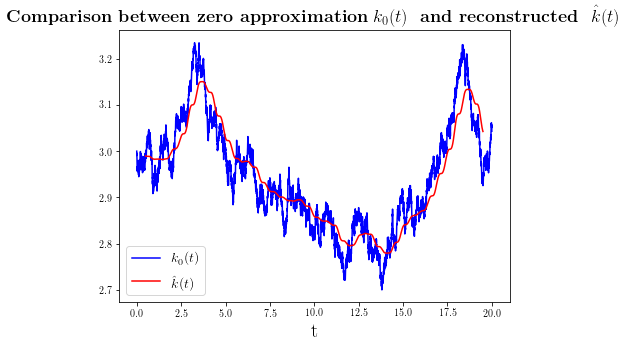

0.00022335723520396222

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=20
L=n*T

N_grid=8000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))
p

st=200
fn=7799


M=1.5

k0=np.zeros(N_grid, np.dtype(float))

# здесь можно подумать над тем, как мы его инициализируем
alpha=0.99999
sigma=0.1
mu=0.1
xi=sigma*np.random.randn(N_grid)+mu


for i in range(N_grid):
    if i==0:
        k0[i]=M*2*dw
    else:
        #k0[i]=alpha*k0[i-1]+np.sqrt(h)*xi[i-1]
        dif=np.random.normal(0, np.sqrt(h)*sigma)
        k0[i]=alpha*k0[i-1]+dif
        if k0[i]<0:
            k0[i]=2*k0[i-1]-k0[i]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, [2*dw]*N_grid, 'r')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

print(k0_f(t[2]+h/2), k0_f(t[2*p]-h/2), k0_f(t[N_grid-1]+h))

f=lambda t, x: 2*dw-k0_f(t)*sin(x)
print(f(1, 0))

init=np.arcsin(2*dw/k0[0])

theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, theta)
plt.plot(0, init, 'ro')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$\theta $', fontsize=20)
plt.title(r'\textbf{Solution of the equation with} $k_0(t)$ \textbf{parameter}', fontsize=18)
plt.show()

theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, x0, label='$x_0(t)$')
plt.plot(t, y0, label='$y_0(t)$')
plt.legend(['x_0(t)', 'y_0(t)'])
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Virtual coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

C_0=[0]*N_grid

for i in range(N_grid):
    if (t[i]-T/2>=0) and (t[i]+T/2<=L):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
phi0=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, theta, 'b')
plt.plot(t, phi0, 'r')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

#dphi0=np.diff(phi0)/h
#dphi0[fn]=dphi0[fn-1]
#dphi0=np.append(dphi0, nan)

#k_hat=np.divide(np.array([2*dw]*N_grid)-dphi0, np.sin(phi0))

k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

mk=np.array([np.mean(k0[st:fn])]*(fn-st))
sk=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk

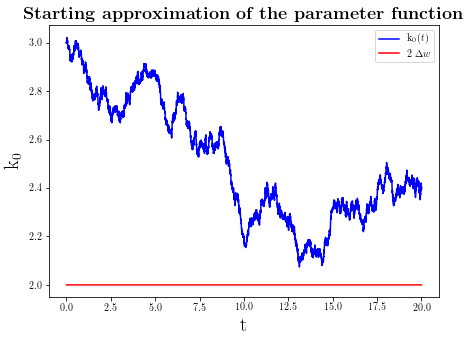

2.9995344811603757 2.77698909873257 2.394684719990212
2.0


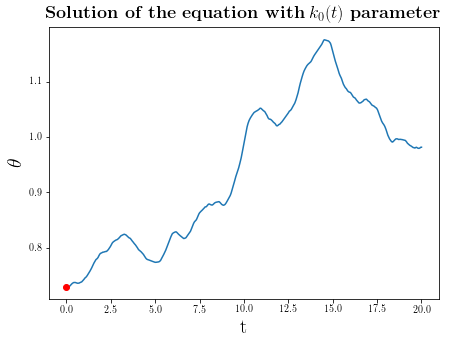

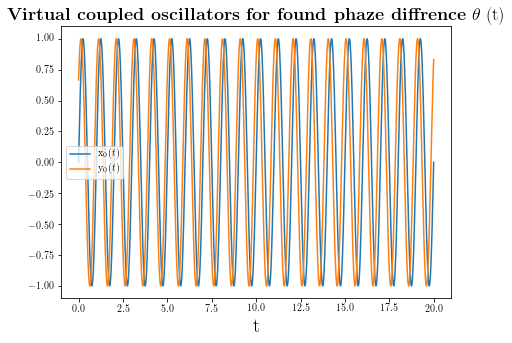

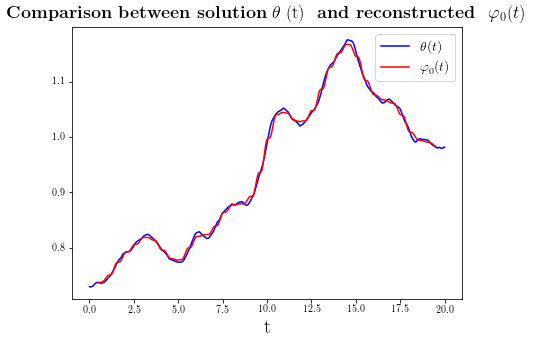

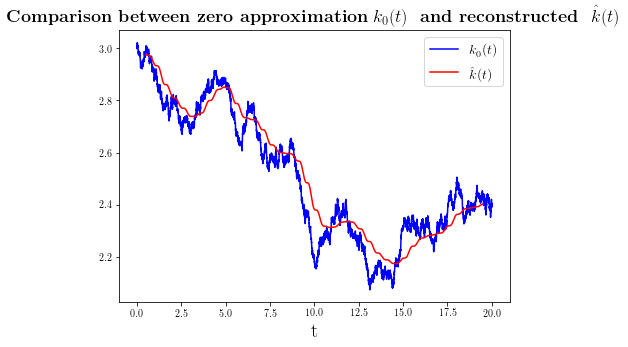

0.00079284316076475773

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=20
L=n*T

N_grid=8000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))
p

st=200
fn=7799


M=1.5

k0=np.zeros(N_grid, np.dtype(float))

# здесь можно подумать над тем, как мы его инициализируем
alpha=0.99995
sigma=0.1
mu=0.1
xi=sigma*np.random.randn(N_grid)+mu


for i in range(N_grid):
    if i==0:
        k0[i]=M*2*dw
    else:
        #k0[i]=alpha*k0[i-1]+np.sqrt(h)*xi[i-1]
        dif=np.random.normal(0, np.sqrt(h)*sigma)
        k0[i]=alpha*k0[i-1]+dif
        if k0[i]<0:
            k0[i]=2*k0[i-1]-k0[i]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, [2*dw]*N_grid, 'r')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

print(k0_f(t[2]+h/2), k0_f(t[2*p]-h/2), k0_f(t[N_grid-1]+h))

f=lambda t, x: 2*dw-k0_f(t)*sin(x)
print(f(1, 0))

init=np.arcsin(2*dw/k0[0])

theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, theta)
plt.plot(0, init, 'ro')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$\theta $', fontsize=20)
plt.title(r'\textbf{Solution of the equation with} $k_0(t)$ \textbf{parameter}', fontsize=18)
plt.show()

theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, x0, label='$x_0(t)$')
plt.plot(t, y0, label='$y_0(t)$')
plt.legend(['x_0(t)', 'y_0(t)'])
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Virtual coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

C_0=[0]*N_grid

for i in range(N_grid):
    if (t[i]-T/2>=0) and (t[i]+T/2<=L):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
phi0=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, theta, 'b')
plt.plot(t, phi0, 'r')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

#dphi0=np.diff(phi0)/h
#dphi0[fn]=dphi0[fn-1]
#dphi0=np.append(dphi0, nan)

#k_hat=np.divide(np.array([2*dw]*N_grid)-dphi0, np.sin(phi0))

k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

mk=np.array([np.mean(k0[st:fn])]*(fn-st))
sk=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk

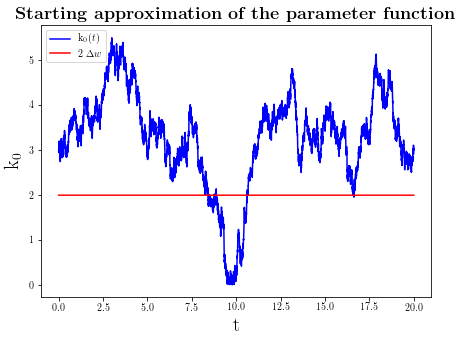

2.993401354656467 3.6780439074098146 2.798558882312521
2.0


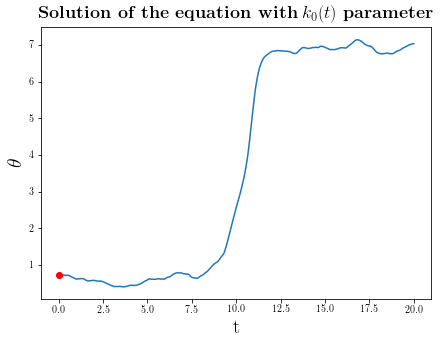

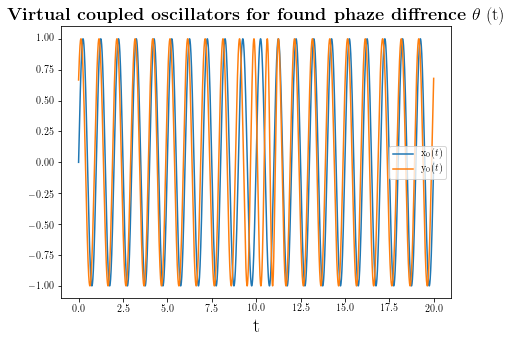

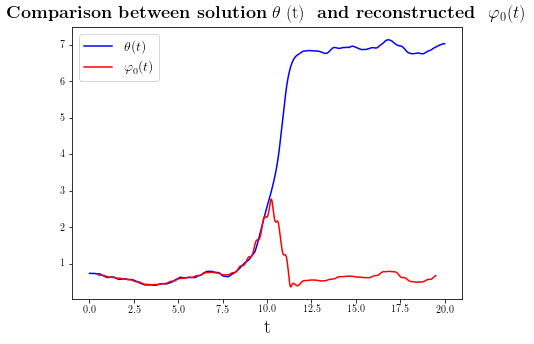

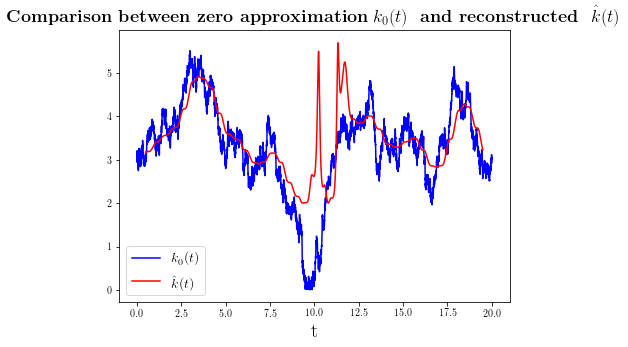

0.050095368723782355

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=20
L=n*T

N_grid=8000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))
p

st=200
fn=7799


M=1.5

k0=np.zeros(N_grid, np.dtype(float))

# здесь можно подумать над тем, как мы его инициализируем
alpha=0.9999
sigma=1
mu=0.1
xi=sigma*np.random.randn(N_grid)+mu


for i in range(N_grid):
    if i==0:
        k0[i]=M*2*dw
    else:
        #k0[i]=alpha*k0[i-1]+np.sqrt(h)*xi[i-1]
        dif=np.random.normal(0, np.sqrt(h)*sigma)
        k0[i]=alpha*k0[i-1]+dif
        if k0[i]<0:
            k0[i]=2*k0[i-1]-k0[i]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, [2*dw]*N_grid, 'r')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

print(k0_f(t[2]+h/2), k0_f(t[2*p]-h/2), k0_f(t[N_grid-1]+h))

f=lambda t, x: 2*dw-k0_f(t)*sin(x)
print(f(1, 0))

init=np.arcsin(2*dw/k0[0])

theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, theta)
plt.plot(0, init, 'ro')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'$\theta $', fontsize=20)
plt.title(r'\textbf{Solution of the equation with} $k_0(t)$ \textbf{parameter}', fontsize=18)
plt.show()

theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, x0, label='$x_0(t)$')
plt.plot(t, y0, label='$y_0(t)$')
plt.legend(['x_0(t)', 'y_0(t)'])
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Virtual coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

C_0=[0]*N_grid

for i in range(N_grid):
    if (t[i]-T/2>=0) and (t[i]+T/2<=L):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
phi0=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, theta, 'b')
plt.plot(t, phi0, 'r')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

#dphi0=np.diff(phi0)/h
#dphi0[fn]=dphi0[fn-1]
#dphi0=np.append(dphi0, nan)

#k_hat=np.divide(np.array([2*dw]*N_grid)-dphi0, np.sin(phi0))

k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

mk=np.array([np.mean(k0[st:fn])]*(fn-st))
sk=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk